In [1]:
# コントラスト法で奥行きを求める
import json
import glob
import cv2
import os, sys
import gzip
import numpy as np
import dotenv
import argparse
import matplotlib.pyplot as plt

In [2]:
# compute RMS contract of im
def RMS_contrast(im):
    img_grey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    contrast = img_grey.std()

    return contrast

# compute Michelson contrast
def Michelson_contrast(im):
    Y = cv2.cvtColor(im, cv2.COLOR_BGR2YUV)[:,:,0]
    
    # compute min and max of Y
    min = np.min(Y)
    max = np.max(Y)

    # compute contrast
    contrast = (max-min)/(max+min)

    return contrast

In [4]:
if __name__ == '__main__':
    DIR = '202410041747'
    
    N_IMG = 400
    PSIZE = 65
    width = 1600
    height = 1200
    STEP = 5

    depth = np.zeros((int((height-PSIZE)/5), int((width-PSIZE)/5)), dtype='uint16')
    values = []

    for i in range(N_IMG):
    #for i in range(10):    
        fname = os.path.join(DIR,f'{i:05d}.bmp')
        im = cv2.imread(fname)
        if im is None:
            continue

        print("image", i, fname)
        value = []
        for y in range(0,height-PSIZE,STEP):
            for x in range(0,width-PSIZE,STEP):
                patch = im[y:(y+PSIZE),x:(x+PSIZE),:]
                value.append(RMS_contrast(patch))
        value = np.array(value)
        value = value.reshape((int((height-PSIZE)/STEP),int((width-PSIZE)/STEP)))
        #plt.imshow(value)
        values.append(value)

image 0 202410041747\00000.bmp
image 1 202410041747\00001.bmp
image 2 202410041747\00002.bmp
image 3 202410041747\00003.bmp
image 4 202410041747\00004.bmp
image 5 202410041747\00005.bmp
image 6 202410041747\00006.bmp
image 7 202410041747\00007.bmp
image 8 202410041747\00008.bmp
image 9 202410041747\00009.bmp
image 10 202410041747\00010.bmp
image 11 202410041747\00011.bmp
image 12 202410041747\00012.bmp
image 13 202410041747\00013.bmp
image 14 202410041747\00014.bmp
image 15 202410041747\00015.bmp
image 16 202410041747\00016.bmp
image 17 202410041747\00017.bmp
image 18 202410041747\00018.bmp
image 19 202410041747\00019.bmp
image 20 202410041747\00020.bmp
image 21 202410041747\00021.bmp
image 22 202410041747\00022.bmp
image 23 202410041747\00023.bmp
image 24 202410041747\00024.bmp
image 25 202410041747\00025.bmp
image 26 202410041747\00026.bmp
image 27 202410041747\00027.bmp
image 28 202410041747\00028.bmp
image 29 202410041747\00029.bmp
image 30 202410041747\00030.bmp
image 31 202410041

In [5]:
values = np.stack(values)
print(values.shape)
depth = np.argmax(values,axis=0)
print(depth.shape)

(array([[  0.,   0.,   0., ...,   0.,   5., 123.],
        [  0.,   0.,   0., ...,   0.,   0., 123.],
        [  0.,   0.,   0., ...,   0.,   0., 108.],
        ...,
        [  4.,   0.,   0., ...,   0.,   0.,   6.],
        [  5.,   0.,   2., ...,   0.,   0.,   5.],
        [  4.,   0.,   4., ...,   0.,   0.,   4.]]),
 array([  1. ,  40.8,  80.6, 120.4, 160.2, 200. , 239.8, 279.6, 319.4,
        359.2, 399. ]),
 <a list of 307 BarContainer objects>)

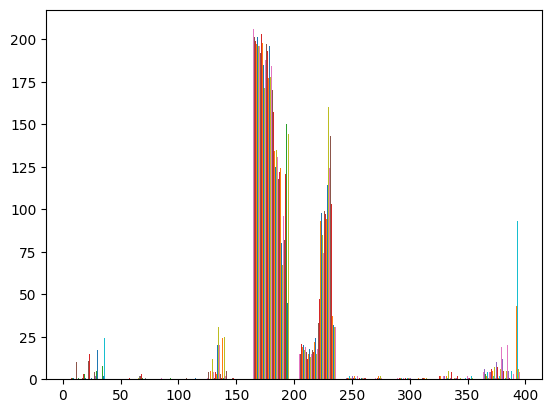

In [17]:
plt.hist(depth)

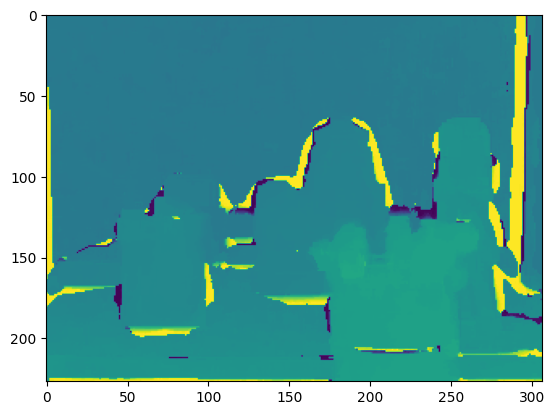

In [14]:
# 奥行きを表示する
plt.imshow(depth)

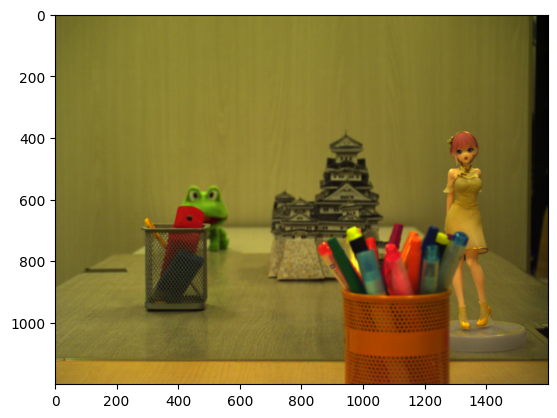

In [24]:
#元画像
fname = os.path.join(DIR,'00200.bmp')
im = cv2.imread(fname)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

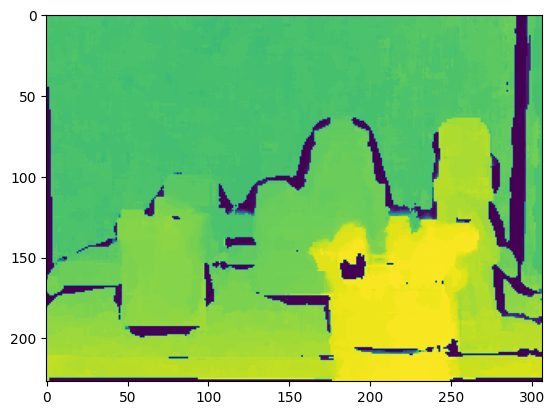

In [23]:
depth2 = depth
THRESH = 230
depth2[np.where(depth2 > THRESH)] = 0
plt.imshow(depth2)